#            < Breast Cancer Diagnosis Report \> 
###         ——       Predict Whether the Cancer is Benign or Malignant 
####             By Jemma Le, Annie Lee, Melissa Perez, Yan Bo Zeng 

## I. Context and Description of the Data

### A. Background information on the subject and field of study.

Breast cancer is cancer that forms in the cells of the breasts. After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.

Substantial support for breast cancer awareness and research funding has helped create advances in the diagnosis and treatment of breast cancer. Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.

The data explores ten visually assessed
characteristics of an FNA sample which are considered relevant to breast cancer diagnosis for diagosing the stage of breast cancer.

### B. Information about Data Collection

The Breast Cancer Diagnostic Data Set was created by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian, professors at University of Wisconsin in 1992. It was constructed on the demand of building sound statistical models to predict whether a breast tumor is benign, noncancerous, or malignant, cancerous, based on the features of cell nucleus sampled from the breast tumor. According to Dr. Wolberg, this work grew out of his desire to accurately diagnose breast smasses based solely on a Fine Needle Aspiration (FNA). He identified nine visually assessed
characteristics of an FNA sample which he considered relevant to diagnosis. A classifier was then constructed using the multi-surface method (MSM) of pattern separation on these nine
features that successfully diagnosed 97% of new cases. Later, the resulting dataset was saved and published for free as this Breast Cancer Diagnostic Data Set.

There are 10 real-valued features stored in the data set. Each of them was computed from
a digitized image of a Fine Needle Aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image:
1. Radius – mean of distances from center to points on the perimeter
2. Texture – standard deviation of gray-scale values
3. Perimeter
4. Area
5. Smoothness – local variation in radius lengths
6. Compactness – (perimeter ^ 2 / area) – 1
7. Concavity – severity of concave portions of the contour
8. Concave Points – number of concave portions of the contour
9. Symmetry
10. Fractal Dimension – coastline approximation – 1

The data set stores the mean, standard error, and “worsts”, which represent the mean of the three
largest values of these features computed for each image, resulting in 30 features.

The collection of this data set was initiated by Dr. Wolberg in 1990 as Dr. Nick Street’s research team began to the help with the image analysis. The results of the research have been
consolidated into a software system known as Xcyt. The data collection process was performed as follows:

1. An FNA was taken from the breast mass. This material was then mounted on a microscope slide and stained to highlight the cellular nuclei. A portion of the slide in which the cells are well-differentiated was then scanned using a digital camera and a frame-grabber board.

2. Researchers then isolated the individual nuclei using Xcyt. Using a mouse pointer, the user drew the approximate boundary of each nucleus. Using a computer vision approach known as “snakes”, these approximations then converged to the exact nuclear boundaries.

3. Once all (or most) of the nuclei had been isolated in this fashion, the program computed values for each of ten characteristics of each nuclei, measuring size, shape and texture. The mean, standard error, and extreme values of these features were computed, resulting in a total of 30 nuclear features for each sample.

4. In total, the final data set consists of 569 cases, or observations, and 32 variables including case IDs, whether the case is “Benign” or “Malignant”, and 30 nuclear features.

## II. Explotary Data Analysis

### A. Data Loading

In [1]:
# Libraries we will use for data analysis
import numpy as  np # Linear algebra 
import pandas as  pd # Data processing 
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
import os
import subprocess

In [2]:
cancer = pd.read_csv('cancer.csv')

### B. Data Features / Variables

Firstly, we started with basic data analysis. Let look at features of the data

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

From the above data information, we found

1) Column __id__ is an unique identifier for each observation, which cannot be used for classificaiton.

2) __Diagnosis__ is our class label, which has two levels -- M (Malignant) and B (Benign)

3) __Unnamed: 32__ feature includes NaN so we will need to remove them  

Therefore, for further data analysis and data modeling, we will drop these unnecessary features. 

### C. Data Preprocessing

In [5]:
# Drop  unnecessary features: id and Unnamed: 32 columns
cancer = cancer.drop(['id','Unnamed: 32'], axis = 1)

# Romove missing values 
cancer = cancer.dropna(axis = 0)

In [6]:
# x includes predictors only; excluse the response variabel
x = cancer.drop(["diagnosis"],axis = 1 ) 
# y includes our labels and x includes our features
y = cancer.diagnosis    # M or B 

In [7]:
# Data Normalization
x_norm = (x - x.mean()) / (x.std())

# Devide the variables into 3 parts based on its function
col_mean= x_norm.columns[0:10]
col_se = cancer.columns[10:20]
col_worst = cancer.columns[20:30]

### D. Summary Statistics and the Distributional Shape of Variables in the Data

In [8]:
cancer.shape

(569, 31)

In [9]:
# Summary statistics
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Notes: area_mean feature's max value is 2501 and smoothness_mean features' max 0.16340. Therefore, we will need __normalization__ before visualization, feature selection, feature extraction or classificaiton.

In [10]:
# Summary Statistics 
bening = cancer[cancer["diagnosis"] == "B"]
malignant =cancer[cancer["diagnosis"] == "M"]

print("variance: ",bening.radius_mean.var())
print("describe method: ",bening.radius_mean.describe())

print("variance: ",malignant.radius_mean.var())
print("describe method: ",malignant.radius_mean.describe())

variance:  3.170221722043872
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64
variance:  10.265430814629346
describe method:  count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


#### (1) Distributional Shape of Response Variables

Number of Benign:  357
Number of Malignant :  212


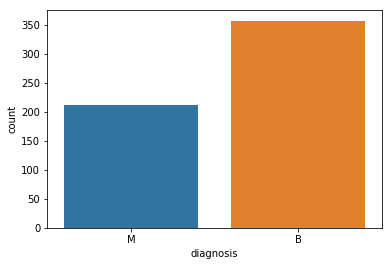

In [11]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.show()

From the distribution plot we can see, benign has higher proportion in the data.

#### (2) Distributional Shape of Predictor Variables

We divided the data into 3 features: mean, standard error and worst so that it helped us to have a better observation on plots. We plotted 3 violin plot by dividing features in 3 groups and each group includes 10 features.

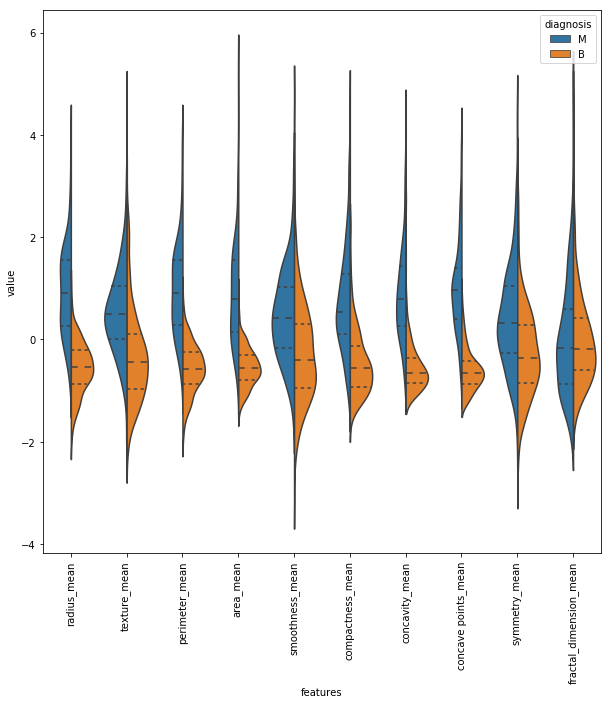

In [12]:
# 1. Col_mean
data1 = pd.concat([y,x_norm[col_mean]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Findings: 

(1)In features like __texture_mean, perimeter_mean, area_mean__ , median of the Malignant and Benign are separated, so they potentially can be good for classification. 

(2) However, in features like __smoothness_mean, symmetry_mean, fractal_dimension_mean__ feature, median of the Malignant and Benign does not looks like separated, so they do not gives good information for classification.

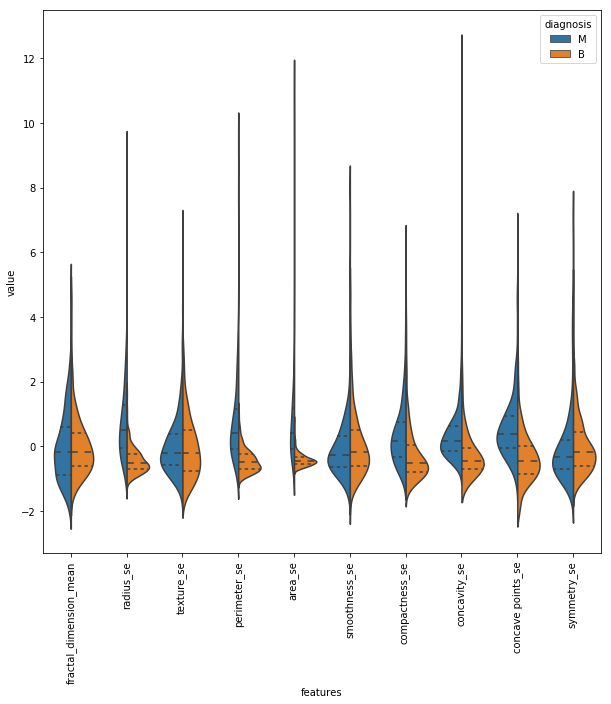

In [13]:
# Col_se
data2 = pd.concat([y,x_norm[col_se]],axis=1)
data2 = pd.melt(data2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Findings:
- Most variables are highly skewed.

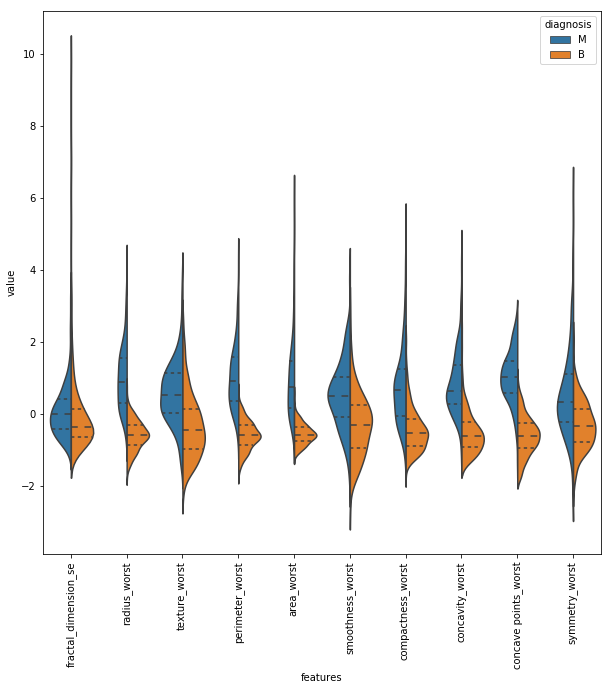

In [14]:
# Col_worst
data3 = pd.concat([y,x_norm[col_worst]],axis=1)
data3 = pd.melt(data3,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data3,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Findings
- __perimeter_worst and area_worst__ are good identifier for the stage of breast cancer.

### E. Unusual features or outliers present in the data

We also used box plox to help us understand more about the data. 

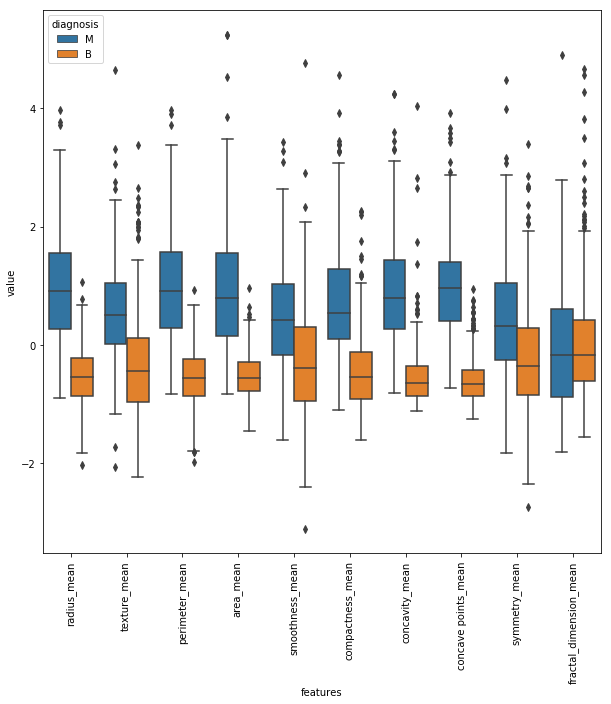

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1)
plt.xticks(rotation=90)
plt.show()

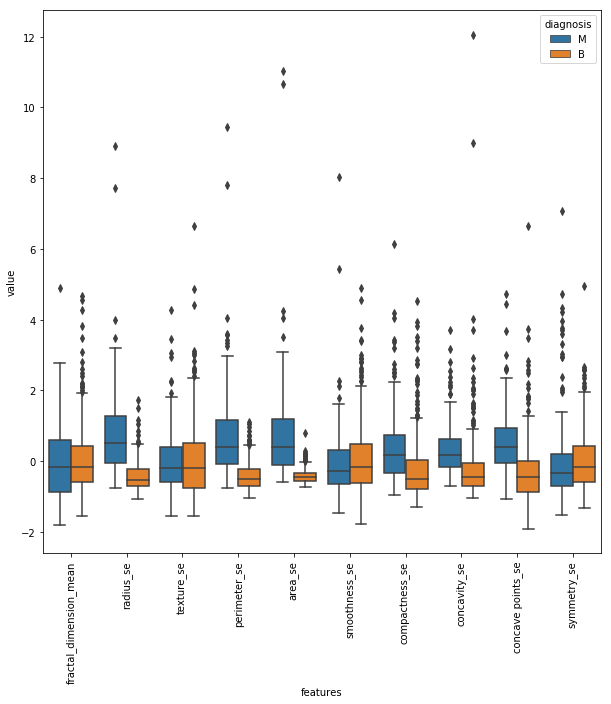

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data2)
plt.xticks(rotation=90)
plt.show()

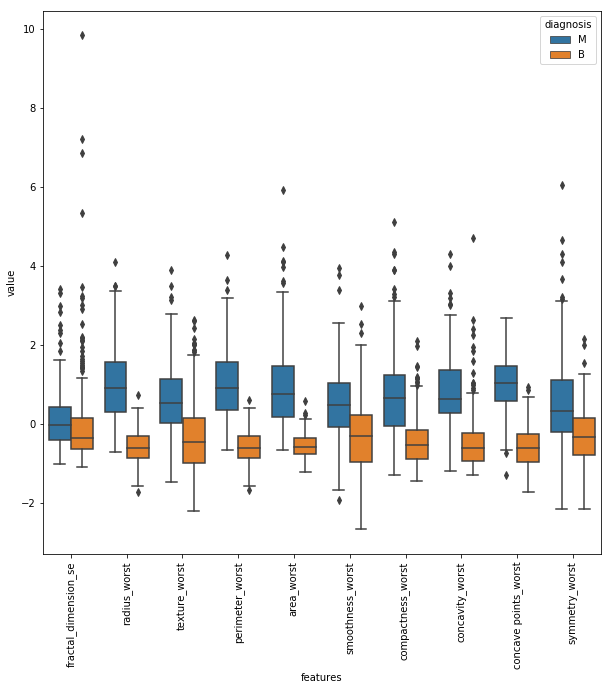

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data3)
plt.xticks(rotation=90)
plt.show()

#### Findings 

- While looking at box plots as we can see there are several values are outliers in each variable. 
- There values can be errors or rare events.

### F. Potential Relationships in the Data

#### (1) Relationship Distribution Between Variables

The 3 join plots below helped us to comapre 2 features easier and deeper.

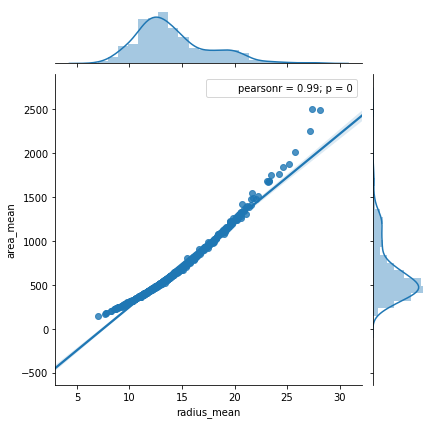

In [18]:
# Plot compare 2 features
sns.jointplot(cancer.radius_mean,cancer.area_mean,kind="regg")
plt.show()

#### Findings: 
- The value of pearsonr was 0.99 which told us that they are strongly correlated. We saw a clear linear relationship between radius mean and area mean with some outliers.

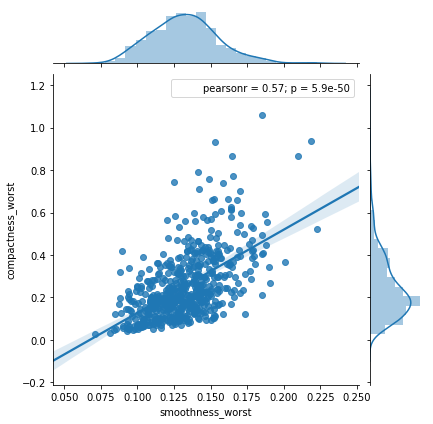

In [19]:
sns.jointplot(cancer.smoothness_worst,cancer.compactness_worst,kind="regg")
plt.show()

- Pearsonr value for compactness worst and smoothness worst was 0.57 which was not very high. Cloud did not show a clear relationship between smoothness_worst and compactness_worst

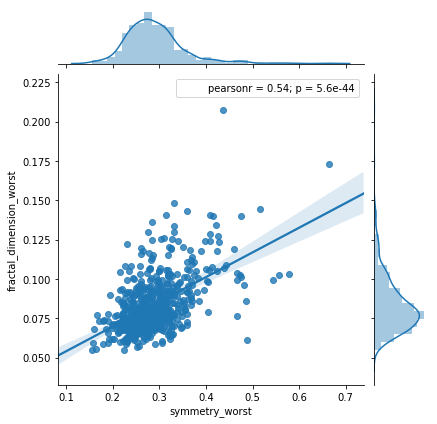

In [20]:
sns.jointplot(cancer.loc[:,'symmetry_worst'], cancer.loc[:,'fractal_dimension_worst'], kind="regg")
plt.show()

- The relationship between symmetry_worst and fractal_dimension_worst is not clear with a Pearsonr value of 0.54. We also saw a lot of outliers.

/Users/jemma.le/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


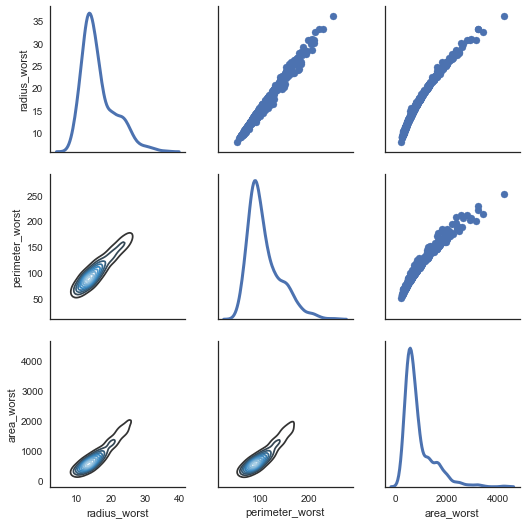

In [21]:
# Relationship between more than 2 distribution
sns.set(style="white")
df = cancer.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#### (2) Correlation Map

In order to observe all correlatin between features, we plotted a heatmap. The green color represented the strongest correlation, and the dark blue represented the weakest correlation.

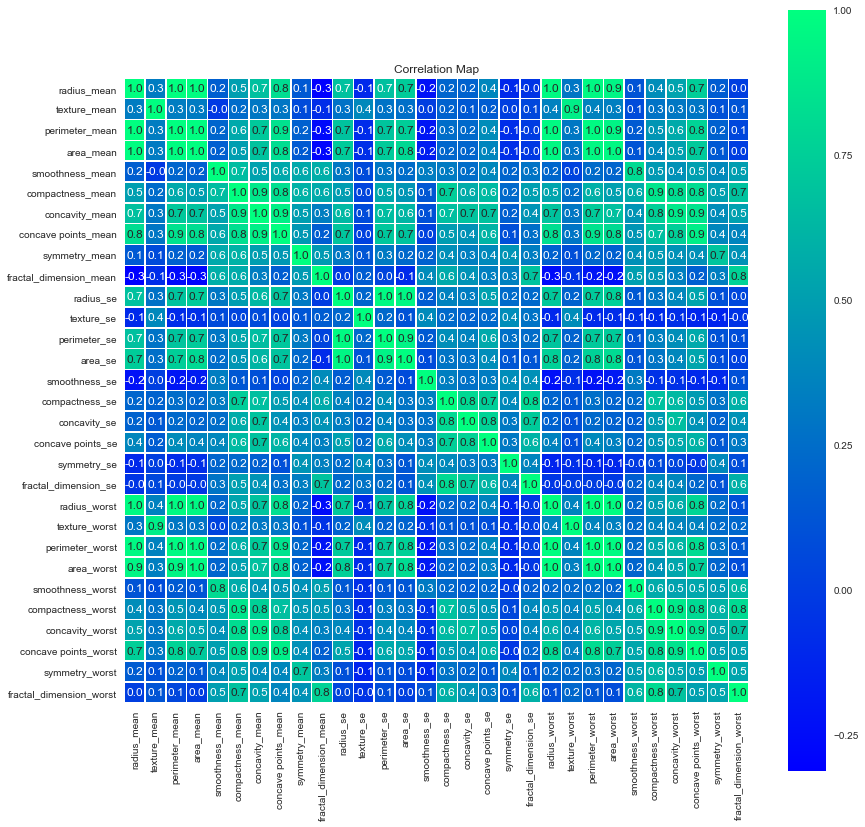

In [22]:
# Correlation
plt.figure(figsize=(14,14))
sns.heatmap(cancer.corr(), cbar = True,  square = True, annot=True, linewidths=.5, fmt= '.1f', cmap = 'winter')
plt.title('Correlation Map')
plt.show()

#### Interpretations
- Correlation map is a huge matrix that includes a lot of numbers. The range of this numbers are -1 to 1.
- Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
- Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
- Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.
- Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

#### (3)

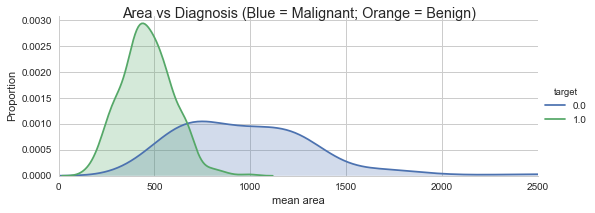

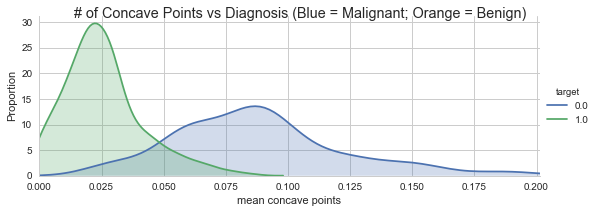

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
sizeMeasurements = pd.DataFrame(data, columns=columns)

sizeMeasurements = pd.DataFrame(data, columns=columns)
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(sizeMeasurements, hue="target",aspect=2.5)
plotOne.map(sns.kdeplot,'mean area',shade=True)
plotOne.set(xlim=(0, sizeMeasurements['mean area'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', 'Proportion')
plotOne.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Green = Benign)')
plt.show()

sns.set_style("whitegrid")
plotTwo = sns.FacetGrid(sizeMeasurements, hue="target",aspect=2.5)
plotTwo.map(sns.kdeplot,'mean concave points',shade= True)
plotTwo.set(xlim=(0, sizeMeasurements['mean concave points'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('mean concave points', 'Proportion')
plotTwo.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Green = Benign)')
plt.show()

## III. Data Modeling 

### Feature Selection

- In feature selection, we are going to draw a correlation graph so that we can remove multicolinearity
- Multicolinearity means the columns are dependenig on each other so we should avoid it because what is the use of using same column twice 
- We will do this analysis for features_mean first then we will do for others and will see who is doing best

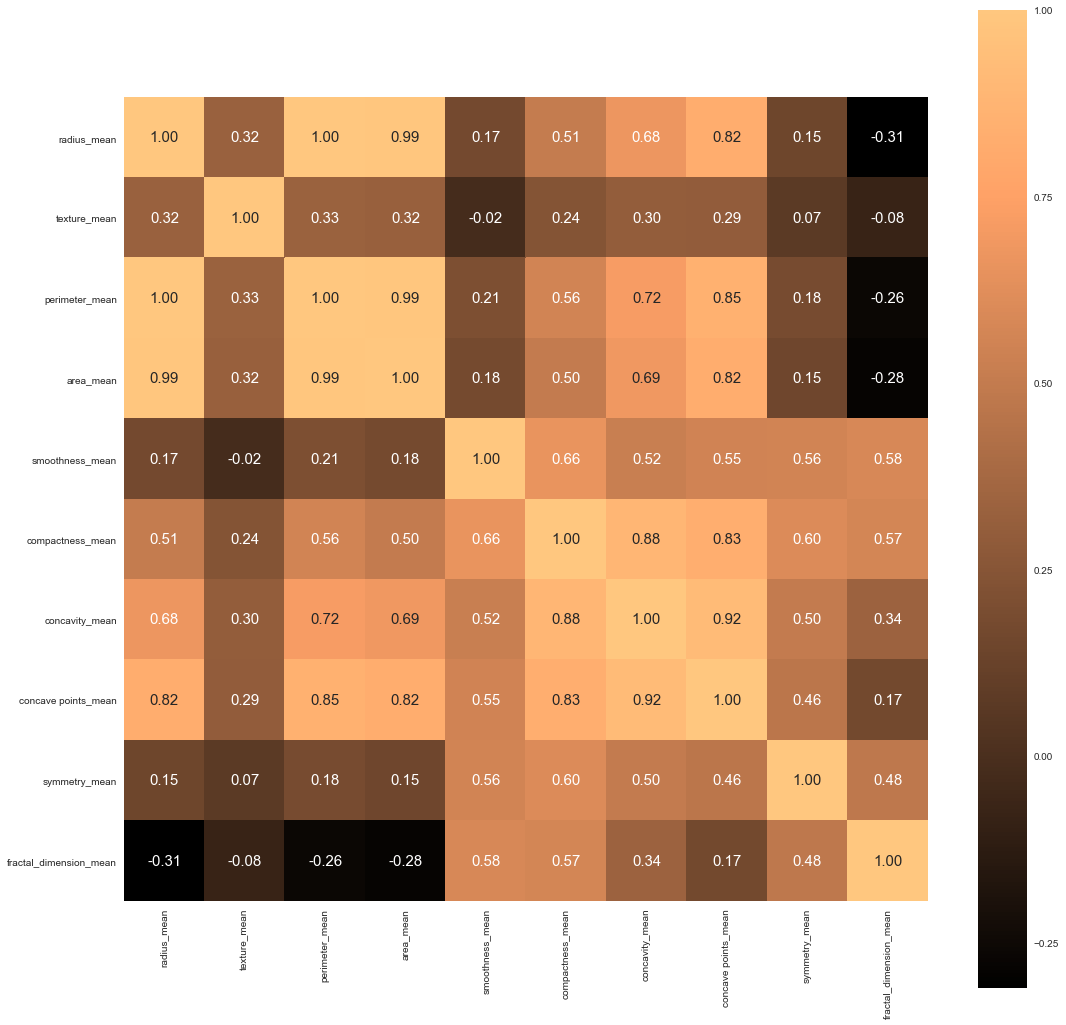

In [43]:
# Devide the data into 3 parts based on its category
category_mean= cancer.columns[1:11]
category_se= cancer.columns[11:20]
category_worst=cancer.columns[21:31]

corr = cancer[category_mean].corr() 
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'copper') 
plt.show()

#### Findings: 

1. the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them

2. compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here

3. so selected parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

In [ ]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [ ]:
#now split our data into train and test
train, test = train_test_split(cancer, test_size = 0.3, random_state=1)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

In [ ]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat
X = cancer[prediction_var] # Making data for CV
y = pd.get_dummies(cancer["diagnosis"]).M
y_test_dum = pd.get_dummies(test_y).M
y_train_dum = pd.get_dummies(train_y).M

### Model I: Random Forest

In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)# a simple random forest model
forest_model.fit(train_X,train_y)# now fit our model for traiing data

In [ ]:
prediction = forest_model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [ ]:
print(classification_report(test_y, prediction))

acc_RF = metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values
print("Accuracy for Random Forest: {}".format(acc_RF)+"\n")

cv_prec_RF = cross_val_score(forest_model, X, y, cv=5, scoring="precision")
print("Precision computed using 5-fold cross-validation: {}".format(cv_prec_RF)+"\n")

RFprecMean = cv_prec_RF.mean()
print("Mean Precision computed using 5-fold cross-validation: {}".format(RFprecMean))

- The accuracy for random forest model is 94.15 %, which seems good.

### Model II: Logistic Regression

In [ ]:
logit1 = LogisticRegression()

logit1.fit(train_X, y_train_dum)
pred = logit1.predict(test_X)

print(classification_report(y_test_dum, pred))

acc_logit = metrics.accuracy_score(y_test_dum, pred)
print("Accuracy for Logistic Regression: {}".format(acc_logit)+"\n")

cv_prec_logit = cross_val_score(logit1, X, y, cv=5, scoring="precision")
print("Precision computed using 5-fold cross-validation: {}".format(cv_prec_logit)+"\n")

LogitprecMean = cv_prec_logit.mean()
print("Mean Precision computed using 5-fold cross-validation: {}".format(LogitprecMean))

In [ ]:
coef_exp = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(np.exp(logit1.coef_)))], axis = 1)
coef_exp.columns = ["Predictors", "Exp Coef"]
print(coef_exp)

### Model III: Classification Tree

In [ ]:
np.random.seed(1)
param_dist = {"max_depth": np.random.randint(1, 6, size=5), "max_features": np.random.randint(1, 6, size=5), "min_samples_leaf": np.random.randint(1, 6, size=5), "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
treecv = RandomizedSearchCV(tree, param_dist, cv=5, random_state=42)

treecv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(treecv.best_params_)+"\n")
print("Best score is {}".format(treecv.best_score_))

In [ ]:
tree1 = DecisionTreeClassifier(min_samples_leaf=5, max_features=5, max_depth=4, criterion="entropy")
tree2 = DecisionTreeClassifier(min_samples_leaf=5, max_features=5, max_depth=4, criterion="entropy")

tree1.fit(train_X, y_train_dum)
pred = tree1.predict(test_X)

print(classification_report(y_test_dum, pred))

acc_tree = metrics.accuracy_score(y_test_dum, pred)
print("Accuracy for Classification Tree: {}".format(acc_tree)+"\n")

cv_prec_tree = cross_val_score(tree1, X, y, cv=5, scoring="precision")
print("Precision computed using 5-fold cross-validation: {}".format(cv_prec_tree)+"\n")

TreeprecMean = cv_prec_tree.mean()
print("Mean Precision computed using 5-fold cross-validation: {}".format(TreeprecMean))

### Model IV: K-Nearest Neighbors

Since the data is all numerical,the K-Nearest Neighbor approach seemed an appropriate choice.

In [ ]:
np.random.seed(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state=42,stratify=y)
#Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

In [ ]:
print(knn.score(X_test, y_test))

The accuracy of 6 neighbors is around 90%. Setting neighbors to 6 was an arbitrary choice. The following graph shows training and testing accuracies by number of neighbors.

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We see that the testing error is the lowest at n=3 neighbors.  Although, 90% accuracy is a great benchmark we will take a look at other quantities such as the confusion matrix and the classification report. Cross-validation will also be performed to determine the best neighbor setting. Arranging a grid from 1 to 20, the function will search to see which location provides the optimal result.

In [ ]:
np.random.seed(1)
param_grid={'n_neighbors':np.arange(1,20)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X, y)

In [ ]:
print(knn_cv.best_score_)

In [ ]:
print(knn_cv.best_params_)

The best score was 93% at 14 neighbors. We will now run KNN again to verify the results.

In [ ]:
np.random.seed(15)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .40, random_state=42,stratify= y)
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
(print(knn.score(X_test, y_test)))

Indeed, we see that the confusion matrix reports only 15 Benign misclassifications and 1 Malignant misclassification. The misclassification rate is 0.07% using the KNN method with 93% precision, recall, & f1-score.

## IV. Conclusion